In [1]:
%matplotlib inline

In [107]:
import pandas
import numpy as np
from matplotlib import pyplot as plt

In [146]:
d = pandas.read_csv('dedup-results.csv')
d = d.drop(['corpus'], axis=1)
d = d[d.ntopics == 512]
d = d.drop(['ntopics'], axis=1)
d = d[d.mrr != 'queued']
d = d[d.mrr != 'started']
d['mrr'] = d.mrr.astype(float)
d

,alpha,eta,sample,mrr
4,0.00390625,0.0625,2,0.302443
5,0.0009765625,0.0009765625,5,0.331612
6,0.001953125,0.015625,4,0.315805
7,0.0625,auto,3,0.324941
9,1.0,0.0009765625,4,0.308571
10,0.0625,1.0,3,0.230136
11,auto,0.00390625,3,0.328391
12,0.0625,0.00390625,4,0.314138
15,0.0625,0.5,1,0.253000
16,0.25,0.5,3,0.269099


In [141]:
a=d.groupby(['alpha', 'eta'])
a

{'boxes': [<matplotlib.lines.Line2D at 0x7f8c220a2150>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8c220eed10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8c2209d990>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8c2209d090>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8c21e85210>,
  <matplotlib.lines.Line2D at 0x7f8c3b3e4610>]}

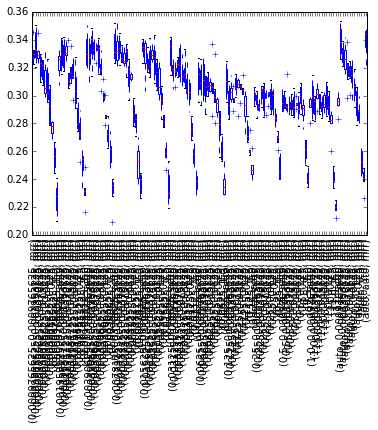

In [142]:
a.boxplot(subplots=False, rot=90, grid=False)

In [145]:
a.mean()

mrr
alpha        eta                   
0.0009765625 0.0009765625  0.331109
             0.001953125   0.335320
             0.00390625    0.330850
             0.0078125     0.320954
             0.015625      0.318332
             0.03125       0.311365
             0.0625        0.307104
             0.125         0.292528
             0.25          0.276256
             0.5           0.255880
             1.0           0.226202
             auto          0.323148
0.001953125  0.0009765625  0.330013
             0.001953125   0.329016
             0.00390625    0.331828
             0.0078125     0.314961
             0.015625      0.318102
             0.03125       0.315417
             0.0625        0.305613
             0.125         0.283649
             0.25          0.272784
             0.5           0.251249
             1.0           0.231662
             auto          0.332039
0.00390625   0.0009765625  0.327445
             0.001953125   0.335783
             0.00390625    0.333018
             0.0078125     0.333167
             0.015625      0.329476
             0.03125       0.318419
...                             ...
0.5          0.0625        0.290869
             0.125         0.299307
             0.25          0.289701
             0.5           0.260585
             1.0           0.240901
             auto          0.292496
1.0          0.0009765625  0.298099
             0.001953125   0.292581
             0.00390625    0.300873
             0.0078125     0.295472
             0.015625      0.292467
             0.03125       0.294890
             0.0625        0.298296
             0.125         0.292506
             0.25          0.280083
             0.5           0.240912
             1.0           0.219569
             auto          0.294976
auto         0.0009765625  0.339124
             0.001953125   0.330110
             0.00390625    0.326954
             0.0078125     0.318925
             0.015625      0.316135
             0.03125       0.314126
             0.0625        0.305266
             0.125         0.294250
             0.25          0.288025
             0.5           0.252255
             1.0           0.240106
             auto          0.339459

[144 rows x 1 columns]

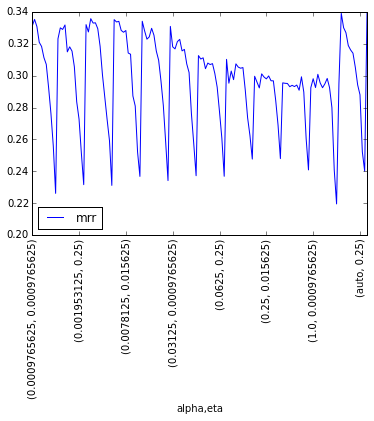

In [144]:
a.mean().plot(rot=90)

{'boxes': [<matplotlib.lines.Line2D at 0x7f8c21dd8d50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8c21d7bd10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8c21d91050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8c21d869d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8c21dd8fd0>,
  <matplotlib.lines.Line2D at 0x7f8c21d7b6d0>]}

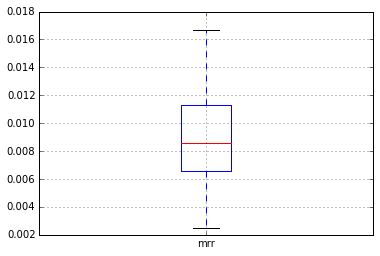

In [127]:
a.std().boxplot()